# JIT Exercise

Everyone likes fractals! (right...?)

Use `jit` (either in function or decorator form) to speed up the Mandelbrot code below.

**Note**: the call to run the `create_fractal` function is commented out because it takes around ~15s to run on a new-ish i7 (which means that a `%timeit` run takes ~45s.  You have been warned). 

In [1]:
from numba import jit
import numpy

from matplotlib import pyplot, cm
%matplotlib inline

In [10]:
@jit
def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    i = 0
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z * z + c
        if (z.real * z.real + z.imag * z.imag) >= 4:
            return i

    return 255

@jit
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

    return image

In [11]:
# Uncomment these to run
image = numpy.zeros((500 * 2, 750 * 2), dtype=numpy.uint8)
image = create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)

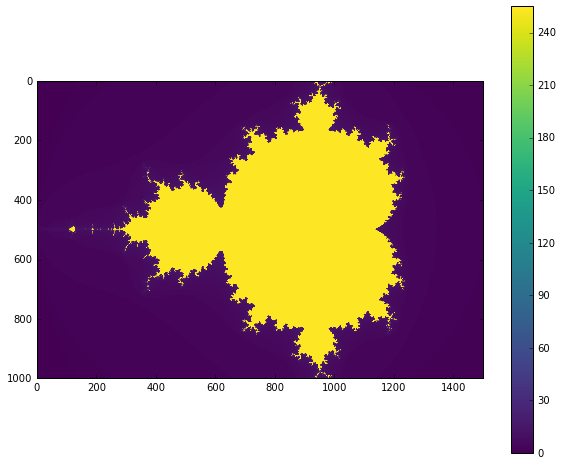

In [12]:
pyplot.figure(figsize=(10,8))
pyplot.imshow(image, cmap=cm.viridis)
pyplot.colorbar();

In [13]:
%%timeit
image = numpy.zeros((500 * 2, 750 * 2), dtype=numpy.uint8)
image = create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)

10 loops, best of 3: 56.2 ms per loop


Lovingly forked from https://github.com/numba/numba/blob/master/examples/mandel.py